# CS 498 AML - Homework 4

## Aaron Blythe

## Daniel Barker

Page 1:  A plot of the mean image for each class. 

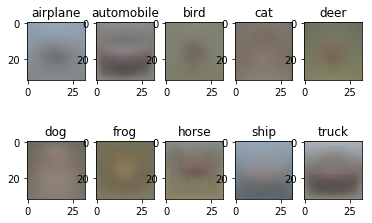

In [10]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  image = np.reshape(mean_int[i], (3, -1)).T
  image = np.reshape(image, (32, 32, -1))
  plt.imshow(image)
  plt.title(label_names[i])
plt.savefig('mean_images.png')

\pagebreak

Page 2: A plot of the average sum of squared pixel-wise difference between the reconstructed and original images of each class as a bar graph vs. the class label.



In [11]:
plt.figure(1, [10,5])
plt.xticks(range(10), label_names)
plt.bar(range(10), error_list, align='center')
plt.savefig('mean_sum_squared_error.png')
#plt.close()

\pagebreak

Page 3: The 2D scatter plot obtained after performing principal coordinate analysis using euclidean distance. 

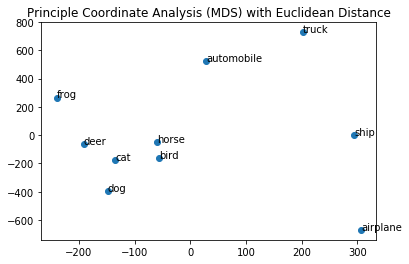

In [12]:
plt.scatter(pca_mds_euclidean[:, 0], pca_mds_euclidean[:, 1])
for i, txt in enumerate(label_names):
    plt.annotate(txt, (pca_mds_euclidean[i, 0], pca_mds_euclidean[i, 1]))
plt.title('Principle Coordinate Analysis (MDS) with Euclidean Distance')
plt.savefig('pca_mds_eudlid.png')

\pagebreak

Page 4: The 2D scatter plot obtained after performing principal coordinate analysis using the similarity metric in part C.

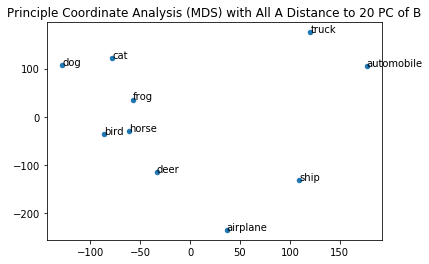

In [13]:
plt.scatter(pca_mds_ea_sim_b[:, 0], pca_mds_ea_sim_b[:, 1], s=20)
for i, txt in enumerate(label_names):
    plt.annotate(txt, (pca_mds_ea_sim_b[i, 0], pca_mds_ea_sim_b[i, 1]))
plt.title('Principle Coordinate Analysis (MDS) with All A Distance to 20 PC of B')
plt.savefig('pca_mds_ea_sim_b.png')

\pagebreak

In [2]:
######## Begining of the code ###########


# PCA from sklearn.decomposition 
from sklearn.decomposition import PCA
# pdist and squareform from scipy.spatial.distance
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
# euclidean_distances from sklearn.metrics 
from sklearn.metrics.pairwise import euclidean_distances

#others
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# debugging
import logging, sys
logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)
#logger.setLevel(logging.WARNING)

In [4]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

In [5]:
# CIFAR-10 is a dataset of 32x32 images in 10 categories,
# You can download this dataset from https://www.cs.toronto.edu/~kriz/cifar.html. 

# website suggestion for python 3
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    # many examples show using 'latin1' instead of 'bytes'
    # this gives us output with out the b' at the start of each one.
    dict = pickle.load(fo, encoding='latin1')
  return dict

# Download the "CIFAR-10 python version" from the website, unzip, and upload to Google Drive
# for orientation, here is the current working directory and contents
import os
print(os.getcwd())
#os.listdir('/content/drive/My Drive/Colab Notebooks/data')
# should have a folder cifar-10-batches-py for the next part to work

cifar10_data_path = 'cifar-10-batches-py/'

meta = unpickle(os.path.join(cifar10_data_path, 'batches.meta'))  
# logging.debug("Meta: \n %s", meta)
# {'num_cases_per_batch': 10000, 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_vis': 3072}
label_names = meta['label_names']


# Reference:
# https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
# Manipulated some for this assignment
def load_cfar10_batch(file_name):
  batch = unpickle(file_name)

  features = np.reshape(batch['data'], (10000, 3072))
  labels = batch['labels']
  labels = np.array(labels).T.reshape(-1, 1)
        
  return features, labels

all_images = np.empty((0, 3072))
all_labels = np.empty((0, 1))

for i in range(1,6):
  file_name = os.path.join(cifar10_data_path, 'data_batch_' + str(i))
  images, labels = load_cfar10_batch(file_name)
  #logging.debug("i: %s", i)
  #logging.debug("feature1: \n %s", feature1)
  #logging.debug("labels: \n %s", labels)
  all_images = np.vstack((all_images, images))
  all_labels = np.vstack((all_labels, labels))
  
# You should combine the test and train sets (all the images) and separate them by category. 

file_name = os.path.join(cifar10_data_path, 'test_batch')
images, labels = load_cfar10_batch(file_name)
#logging.debug("feature1: \n %s", feature1)
logging.debug("labels: \n %s", labels)
all_images = np.vstack((all_images, images))
all_labels = np.vstack((all_labels, labels))


/Users/ablythe/code/MCSDS/cs498aml/cs498aml-hw4


In [6]:
logger.setLevel(logging.INFO)
# Part A
# For each category, compute the mean image and the first 20 principal components. 
# Plot the error resulting from representing the images of each category using the first 20 principal components against the category as a bar graph 
# (refer to the Procedures section for clarifications). 

# 1. For each class, find the mean image, and compute the first 20 principal components.

mean_images = np.zeros((10,3072))
eigen_vector_list = []

for i in range(10):
  idx = np.where(all_labels == i)[0]
  mean_image = np.mean(all_images[idx], axis=0)
  mean_images[i] = mean_image

# 2. Now use the mean as well as the principle components to compute a low-dimensional reconstruction of each image in the class. 
# Hint: Libary functions will come in handy here. Refer to section 7.1.2 and 7.1.3 for theory.


# 3. Now for each image, compute the squared difference between the original and reconstructed version, and sum this over all pixels over all channels. 
# If you have flattened your images, this is simply the squared euclidean distance between the image vectors. 
# Take the average of the value you computed above over all images in the class.

# Notes: I believe the python version is already flattened
# https://uiuc-mcsds.slack.com/archives/C6XG1FMPF/p1550244765421400

mean_int = mean_images.astype(np.int)
plt.figure(figsize=(9, 9))
pca = PCA(n_components=20)
error_list = []
for i in range(10):
  idx = np.where(all_labels == i)[0]
  class_images = all_images[idx]
  class_fit = pca.fit(class_images)
  class_pca = class_fit.transform(class_images)
  eigen_vector_list.append(np.array(pca.components_).transpose())
  # ValueError: operands could not be broadcast together with shapes (6000,3072) (6000,20) 
  # so need one more inverse transform
  class_pca = class_fit.inverse_transform(class_pca)
  mean_sum_square_error = np.mean(np.sum((class_images - class_pca)**2))
  error_list.append(mean_sum_square_error)

  plt.subplot(2, 5, i+1)
  image = np.reshape(mean_int[i], (3, -1)).T
  image = np.reshape(image, (32, 32, -1))
  plt.imshow(image)
  plt.title(label_names[i])
plt.savefig('mean_images.png')
#plt.close()


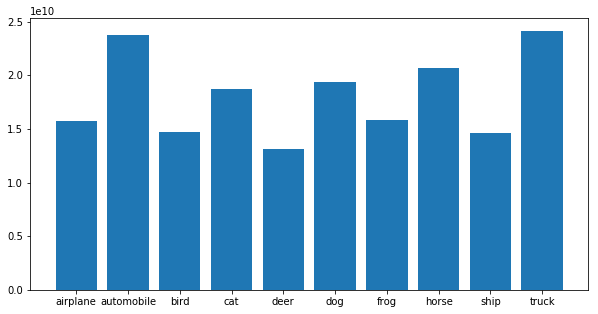

In [7]:
# 4. Plot the above value in the bar graph against its category/class label. You will submit this plot.

plt.figure(1, [10,5])
plt.xticks(range(10), label_names)
plt.bar(range(10), error_list, align='center')
plt.savefig('mean_sum_squared_error.png')
#plt.close()

 Principal Coordinate Analysis (MDS)

This procedure can be found on page 120 of the textbook. There are some minor typos in the textbook version. Refer to this procedure instead. For the following procedure, the set of points whose mutual distances you will start out with are the mean images of each class. Note: Be careful not to accidentally square your already squared distances matrices when implementing the second bullet point below.

Assume we have a matrix D(2) consisting of squared differences between each pair of N points, and we wish to compute a set of points in s dimensions, such that the distances between these points are as similar as possible to the distances in D(2).

 *   First form the centering matrix A as described in section 7.1.2 on page 118. A = I - 1⁄N11T
 *   Now form W = -½AD(2)AT
 *   Next, form U and Λ such that WU = UΛ. These are respectively the eigenvectors and eigenvalues of W. Ensure that the entries of Λ are sorted in decreasing order. Notice that you need only the top s eigenvalues and their eigenvectors, and many packages can extract these quickly, instead of constructing all of them.
 *   Choose s, the number of dimensions you wish to represent. Form Λs, the top left s x s block of Λ.
*    Form Λs½, whose entries are the positive square roots of Λs. Construct Us, the matrix consisting of the first s columns of U.
 *   Finally, compute Y = UsΛs½ . Each row in the result is a point you must plot.


/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


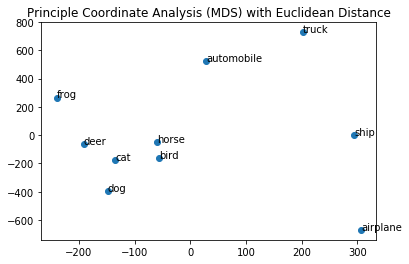

In [8]:
#logger.setLevel(logging.DEBUG)
# Part B
# Compute the distances between mean images for each pair of classes. 
# Use principal coordinate analysis (refer to the Procedures section for clarifications) to make a 2D map of the means of each categories. 
# (Follow procedure 7.2 on page 120 of the book)

# 1. Compute a 10 x 10 distance matrix D such that D[i,j] is the Euclidean distance between the mean images of class i and class j. 
# Square the elements of this matrix and write it out to a CSV file named partb_distances.csv. You will submit this file.
# Note: The order of the class labels is very important here, as this file will be autograded. 
# Refer to this for the index-label mapping, and ensure yours matches.

euclidean_distance = np.square(euclidean_distances(mean_images, mean_images))
#logging.debug("Euclidean Distance: \n %s", euclidean_distance)
np.savetxt("partb_distances.csv", euclidean_distance, delimiter=',')

# 2. Now you must perform multi-dimensional scaling with the squared distance matrix you have. 
# Refer to the MDS section for details on how to do that.

# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
# mds = MDS(n_components=2, max_iter=300, eps=1e-6, random_state=1, dissimilarity="precomputed", n_jobs=1)
# embedding = mds.fit(euclidean_distance).embedding_ 

def pca_mds(distance):
  # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.identity.html
  # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html
  A = np.identity(10) - np.ones((10,10))/10
  # W = -½AD(2)AT
  W = -(1/2) * np.dot(np.dot(A,distance), A.T)
  # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.eig.html
  eigen_value, eigen_vector = np.linalg.eig(W)
  # sort decreasing https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
  sorted = np.argsort(eigen_value)[::-1]
  eigen_value = np.sqrt(eigen_value[sorted])
  # s dimensions where s is 2
  eigen_value_s = np.diag([eigen_value[1], eigen_value[0]])
  logging.debug("eigen_value: \n %s", eigen_value_s)
  # Construct Us, the matrix consisting of the first s columns of U.
  eigen_vector_s = np.empty((10, 2))
  eigen_vector_s[:, 0] = eigen_vector[:, 0]
  eigen_vector_s[:, 1] = eigen_vector[:, 1]
  # Y = UsΛs½ 
  Y = (1/2) * np.dot(eigen_vector_s, eigen_value_s)
  logging.debug("Y: \n %s", Y)
  return Y
  
pca_mds_euclidean = pca_mds(euclidean_distance)

# 3. Once you have computed the scaled points in 2-D space, plot the first component along the x-axis and component 2 along the y-axis of a scatter plot. 
# You will submit this plot.

plt.scatter(pca_mds_euclidean[:, 0], pca_mds_euclidean[:, 1])
for i, txt in enumerate(label_names):
    plt.annotate(txt, (pca_mds_euclidean[i, 0], pca_mds_euclidean[i, 1]))
plt.title('Principle Coordinate Analysis (MDS) with Euclidean Distance')
plt.savefig('pca_mds_eudlid.png')
#plt.close()





/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


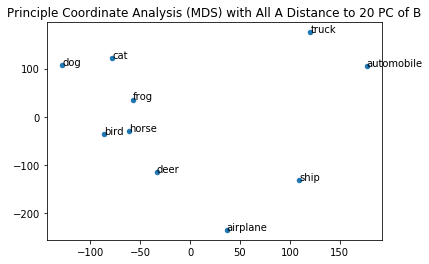

In [9]:
# Part C
# Here is another measure of the similarity of two classes. 
# For class A and class B, define E(A → B) to be the average error obtained by representing all the images of class A using the mean of class A 
# and the first 20 principal components of class B (Refer to Procedures section for explicit definition). 
# This should tell you something about the similarity of the classes. Now define the distance metric between classes to be
# (1/2)(E(A → B) + E(B → A)). 
# Use principal coordinate analysis to make a 2D map of the classes. 
# Compare this map to the map in the previous exercise – are they different? why?

# Just like in Part B, you will first compute a 10 x 10 distance matrix. However, here, D[i,j] will contain E(i → j). Let's define E(A → B).
#        E(A → B) = (E(A| B) + E(B|A))/2
#        To compute E(A|B), use the mean image of class A and the first 20 principal components of class B to reconstruct the images of class A
#        Once you have the reconstructed images, use the procedure described in steps 3 and 4 of Part A to compute the mean of the sum of pixel-wise squared difference between the reconstructed and original images.
#        Similarly compute E(B|A).
#        Note: E(A|A) != 0, as a sanity check.

def ea_sim_b(i, j):
  idx = np.where(all_labels == i)[0]
  i_data = all_images[idx]
  jdx = np.where(all_labels == j)[0]
  j_data = all_images[jdx]
  pca = PCA(n_components=20)
  fit_j = pca.fit(j_data)
  trans_ij = fit_j.transform(i_data)
  trans_ij = fit_j.inverse_transform(trans_ij)    
  mean_sim_diff = np.mean(np.sum(np.square(trans_ij - i_data), axis=1))
  return mean_sim_diff

distances = np.zeros((10, 10))
for i in range(10):
  for j in range(i, 10):
    dist = ((ea_sim_b(i, j) + ea_sim_b(j, i)))/2
    distances[i][j] = dist
    distances[j][i] = dist

# Once you have computed D, write it out to a CSV file named partc_distances.csv. 
# You will submit this file. Again, make sure the index-label ordering is correct in your matrix.
# Note: There is no need to square the values in D as they are already averaged square distances.

np.savetxt('partc_distances.csv', distances, delimiter=',')

# Perform MDS with this distance matrix, and once you have the scaled points in 2-D, 
# plot the first component along the x-axis and component 2 along the y-axis of a scatter plot. You will submit this plot.

# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
# mds = MDS(n_components=2, max_iter=300, eps=1e-6, random_state=1, dissimilarity="precomputed", n_jobs=1)
# embedding2 = mds.fit(distances).embedding_ 

pca_mds_ea_sim_b = pca_mds(distances)


plt.scatter(pca_mds_ea_sim_b[:, 0], pca_mds_ea_sim_b[:, 1], s=20)
for i, txt in enumerate(label_names):
    plt.annotate(txt, (pca_mds_ea_sim_b[i, 0], pca_mds_ea_sim_b[i, 1]))
plt.title('Principle Coordinate Analysis (MDS) with All A Distance to 20 PC of B')
plt.savefig('pca_mds_ea_sim_b.png')
